Have followed https://realpython.com/python-boto3-aws-s3/

* Client: low-level service access
* Resource: higher-level object-oriented service access

## Creating a Bucket
To start off, you need an S3 bucket. To create one programmatically, you must first choose a name for your bucket. Remember that this name must be unique throughout the whole AWS platform, as bucket names are DNS compliant. If you try to create a bucket, but another user has already claimed your desired bucket name, your code will fail. Instead of success, you will see the following error: botocore.errorfactory.BucketAlreadyExists.

You can increase your chance of success when creating your bucket by picking a random name. You can generate your own function that does that for you. In this implementation, you’ll see how using the uuid module will help you achieve that. A UUID4’s string representation is 36 characters long (including hyphens), and you can add a prefix to specify what each bucket is for.

In [1]:
from IPython.display import Image

In [2]:
import uuid
import boto3

s3_client = boto3.client('s3')
s3_resource = boto3.resource('s3')

In [3]:
def create_bucket_name(bucket_prefix):
    """
    Convenience function to create a unique bucket name.
    The generated bucket name must be between 3 and 63 chars long.
    """
    return ''.join([bucket_prefix, str(uuid.uuid4())])

We can use this convenience to create unique bucket names

In [4]:
create_bucket_name('test-')

'test-5191cc48-aaed-4b69-8e54-cdbe05943598'

You’ve got your bucket name, but now there’s one more thing you need to be aware of: unless your region is in the United States, you’ll need to define the region explicitly when you are creating the bucket. Otherwise you will get an IllegalLocationConstraintException.

Anyways move on and create a bucket

In [5]:
bucket_response = s3_resource.create_bucket(Bucket=create_bucket_name('test-'))

In [6]:
bucket_response

s3.Bucket(name='test-d266d7e3-8e2f-493a-bb18-ac0d01d4e6da')

In [7]:
bucket_response.name

'test-d266d7e3-8e2f-493a-bb18-ac0d01d4e6da'

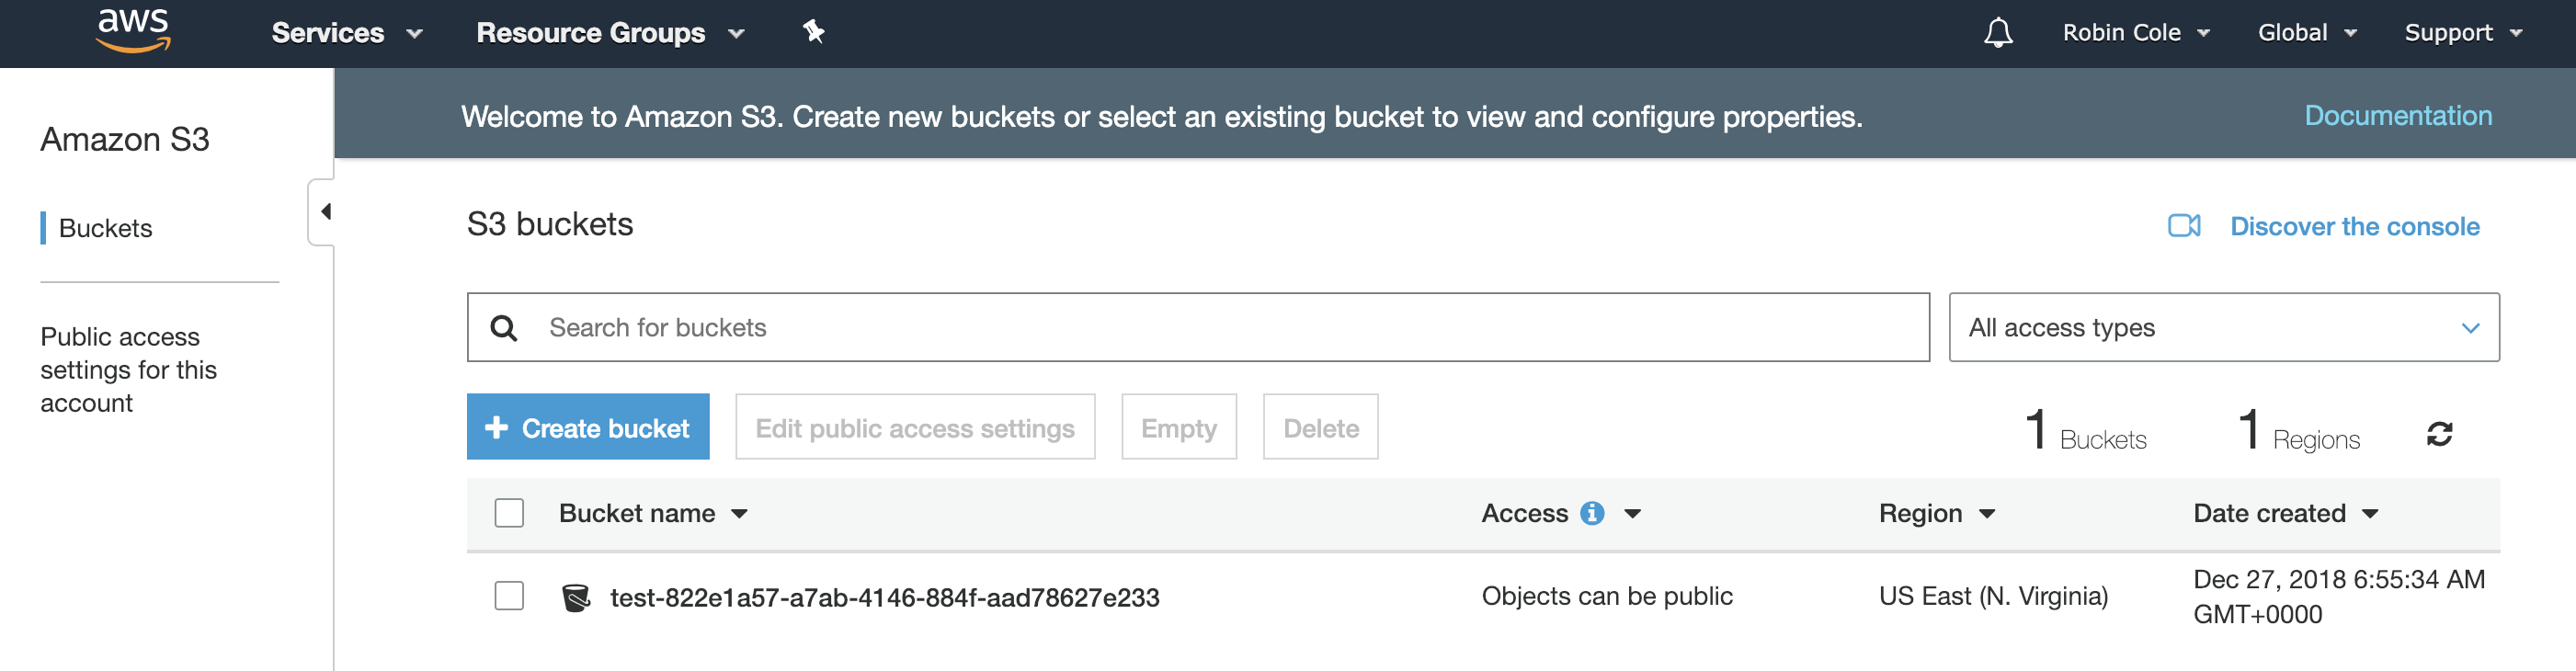

In [8]:
test_image = "aws_bucket_view.png"
Image(test_image)

## File upload with client
[Also see this example.](https://github.com/Kyohei-Inuzuka/ImageUploader/blob/master/src/ImageUploader.py)

You can also upload a file using the client:

In [9]:
s3_client.upload_file(Filename=test_image, Bucket=bucket_response.name, Key=bucket_response.name)

No errors and the image uploaded. I can view it on the AWS console. We can also download it

In [10]:
s3_client.download_file(Bucket=bucket_response.name, Key=bucket_response.name, Filename="my_downloaded_img.png")

In [11]:
ls

Getting started with boto.ipynb  my_downloaded_img.png
README.md                        tinyS3.ipynb
aws_bucket_view.png              upload_file_to_s3_clarifai.py
family.jpg


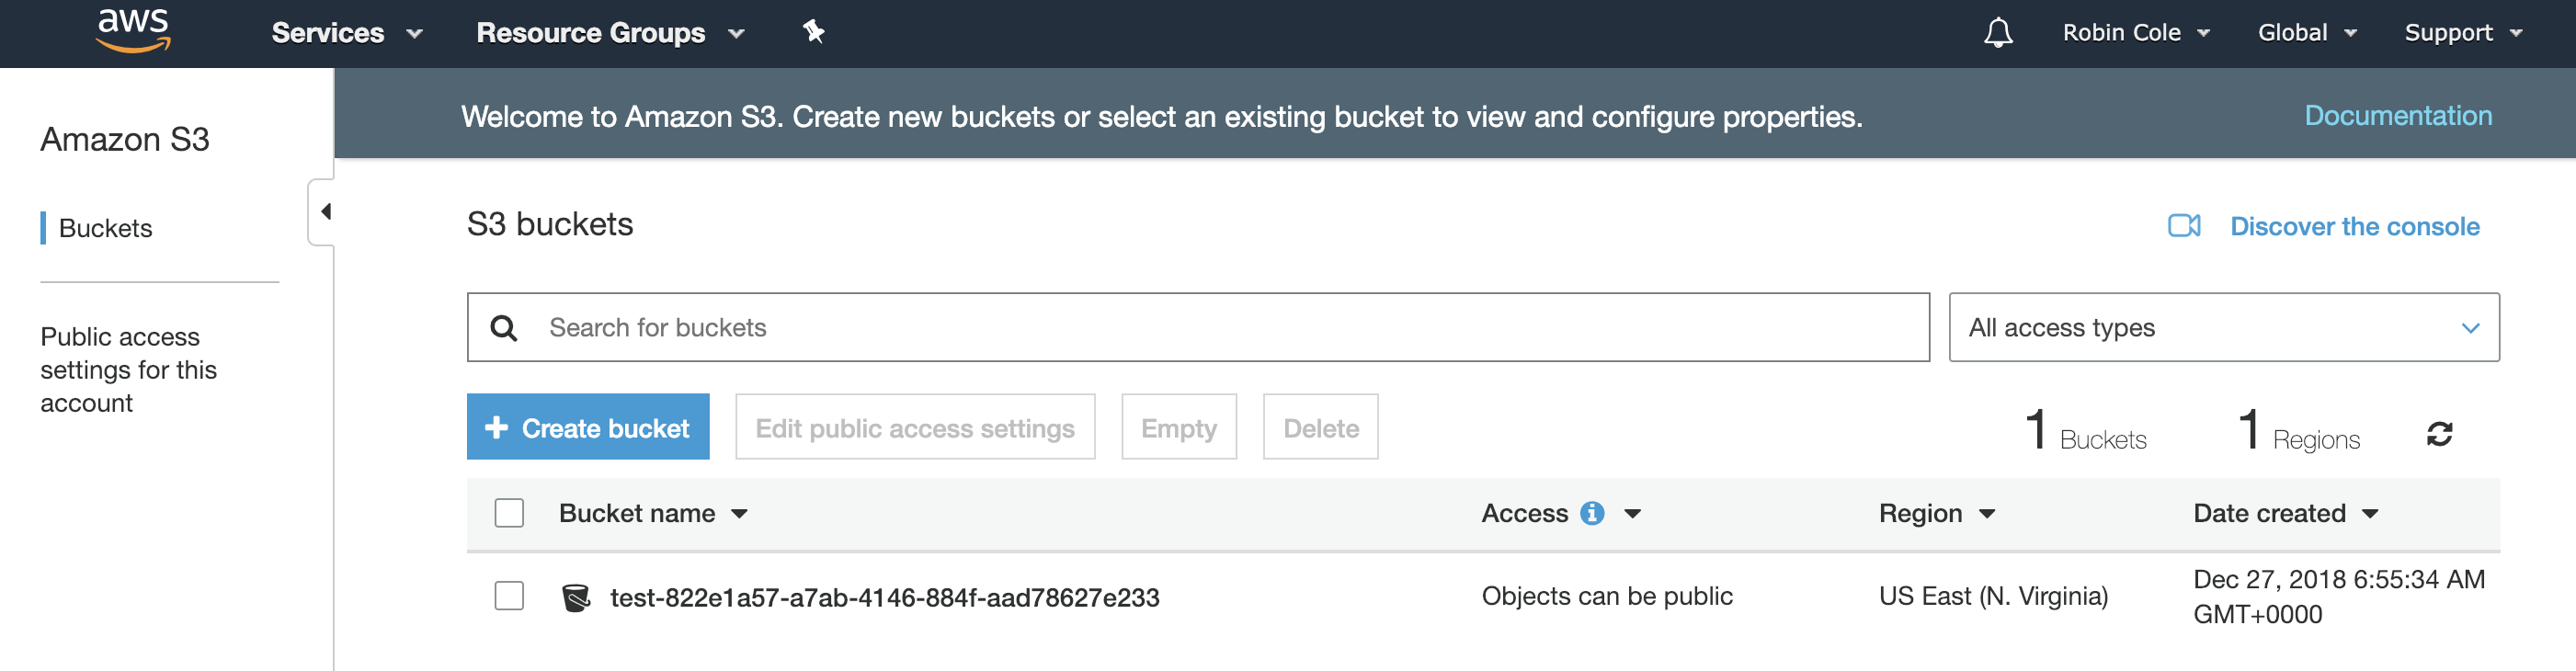

In [12]:
downloaded_image = "my_downloaded_img.png"
Image(downloaded_image)

For images, we can make them publicly viewable via their url